In [3]:
import librosa
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt
import time

In [58]:
t, sr = librosa.load("sd.mp3")
print(t.shape, sr)

/home/hesham/.local/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


(4720896,) 22050


In [146]:
def audio_to_mdb(t, sr, n_m=129):
    mpw = librosa.feature.melspectrogram(y=t, sr=sr,n_fft=2048, hop_length=512, n_mels=n_m)
    mdb = librosa.power_to_db(mpw, ref=np.max)
    return mdb, np.max(mpw)

def mdb_to_audio(mdb, max_pw=1):
    mpw = librosa.db_to_power(mdb)
    mel_inv = librosa.feature.inverse.mel_to_stft(mpw)
    # sqrt of max power is max amplitude in stft
    # this preserves the volume without slowing down mel_to_stft by denormalizing mpw
    t = librosa.griffinlim(mel_inv * np.sqrt(max_pw))
    return t

def mdb_to_img(mdb):
    a = mdb.transpose().reshape((-1, 3)).copy()
    p = int(np.ceil(np.sqrt(a.shape[0])))
    a.resize(p*p*3)
    b = a.reshape((p,p,3))
    i = b / -80
    return i

def img_to_mdb(i, m_n=129):
    b = i * -80
    a = b.reshape((-1)).copy()
    a.resize(a.shape[0] - a.shape[0] % m_n)
    a = a.reshape((-1, 3))
    mdb = a.reshape((-1, m_n)).transpose()
    return mdb

def audio_to_img(t, sr):
    mdb, max_pw = audio_to_mdb(t, sr)
    return {'img': mdb_to_img(mdb), 'sr': sr, 'max_pw': max_pw}

def img_to_audio(imudio):
    mdb = img_to_mdb(imudio['img'])
    t = mdb_to_audio(mdb, imudio['max_pw'])
    return t, imudio['sr']

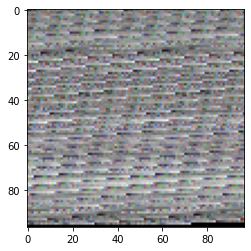

In [157]:
rec = t[sr*30:sr*35]
imudio = audio_to_img(rec, sr)
plt.imshow(imudio['img'])

In [158]:
rec_rev, sr = img_to_audio(imudio)

In [159]:
sd.play(rec_rev, sr)
time.sleep(5)
sd.stop()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


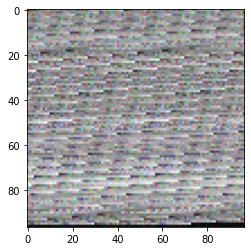

In [163]:
from copy import deepcopy
imudio_mod = deepcopy(imudio)
imudio_mod['img'] += np.random.rand(*imudio_mod['img'].shape)* 0.1
plt.imshow(imudio_mod['img'])

In [173]:
rec_rev, sr = img_to_audio(imudio_mod)
sd.play(rec_rev, sr)
time.sleep(5)
sd.stop()

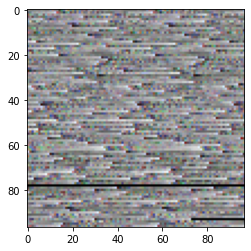

In [176]:
imudio_sh = deepcopy(imudio)
np.random.shuffle(imudio_sh['img'])
plt.imshow(imudio_sh['img'])

In [178]:
rec_rev, sr = img_to_audio(imudio_sh)
sd.play(rec_rev, sr)
time.sleep(5)
sd.stop()